# Information Retrival :  Assignment 1 Part 2
- ### Submitted to Ma'am Naima
- #### Submitted by : Hassan Ashiq BESE 23 C
- ###### Link to my GitHub Repository : <a href="https://github.com/hassanashiqasse/PCA">Click Here</a>


In [ ]:
import os
import cv2
from PIL import Image
from numpy import asarray
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage import io,transform
from numpy import linalg as LA
import matplotlib.image as mpimg

### Reading all pictures from the folder to dirList

In [ ]:
dirList=[]
for root,dirs,files in os.walk('C:\\Users\\Evil\\lfw'):
    for f in files:
        dirList.append(os.path.join(root, f))



## since all images were not in '32' dimension, so converting 5000 images from dirList to desired dimension

In [ ]:
images32=[]
for i in range(5001):
    images=Image.open(dirList[i])
    name=os.path.basename(str(i))
    image_resized=images.resize((32,32), Image.NEAREST)
    image_resized.save('C:/Users/Evil/Desktop/resized_pictures_32/pic32_' +name+'.jpg')

    
print("done")
    
    
    

### Reading all 32*32 pictures from the folder to imgList

In [37]:
imgList=[]
for root,dirs,files in os.walk('C:\\Users\\Evil\\resized_pictures_32'):
    for f in files:
        imgList.append(os.path.join(root, f))

            
print(imgList[0:3], sep = "\n")    

['C:\\Users\\Evil\\resized_pictures_32\\pic32_0.jpg', 'C:\\Users\\Evil\\resized_pictures_32\\pic32_1.jpg', 'C:\\Users\\Evil\\resized_pictures_32\\pic32_10.jpg']


## Reading collection of 32 x 32 images

In [38]:
imList=(io.imread_collection(imgList))

In [39]:
imList

## Making a Matrix where we will store RGB values for each image

In [40]:
res=np.zeros(shape=(1,3))
for i in range(len(imList)):
    # Using the skimage.transform function-- resize image (m x n x dim).
    m=transform.resize(imList[i],(32,32,3))
     # Reshape the matrix to a list of rgb values.
    arr=m.reshape((32*32),3)
    # concatenate the vectors for every image with the existing list.
    res=np.concatenate((res,arr),axis=0)

res
    
    

array([[0.        , 0.        , 0.        ],
       [0.        , 0.01960784, 0.        ],
       [0.        , 0.01960784, 0.        ],
       ...,
       [0.2627451 , 0.30196078, 0.25882353],
       [0.20784314, 0.25098039, 0.19607843],
       [0.25490196, 0.29803922, 0.24313725]])

In [53]:
# delete initial zeros' row
res=np.delete(res, (0), axis=0)

In [54]:
# print list of vectors - 3 columns (rgb)
print(res)

[[0.         0.01960784 0.        ]
 [0.00784314 0.01568627 0.        ]
 [0.01176471 0.01960784 0.00784314]
 ...
 [0.2627451  0.30196078 0.25882353]
 [0.20784314 0.25098039 0.19607843]
 [0.25490196 0.29803922 0.24313725]]


## Taking mean of Resized images RGB Values

In [55]:
m=res.mean(axis=0)
print(m)

[0.43852334 0.38385175 0.34623146]


## Taking covariance of Resized matrix

In [44]:
#taking covariance

cov_res= np.cov(res, rowvar=False)
print(cov_res)

[[0.08550413 0.07418357 0.06481568]
 [0.07418357 0.07414059 0.06825527]
 [0.06481568 0.06825527 0.07104992]]


## Getting Eigen Vectors and Values from Co-variance matrix

In [45]:
#getting eigen vectors and values

e_values, e_vectors=LA.eigh(cov_res)
print('Eigen Values are : ' ,e_values)
print('\nEigen Vectors are : \n',e_vectors)



Eigen Values are :  [0.00210324 0.0131756  0.2154158 ]

Eigen Vectors are : 
 [[ 0.36108952 -0.71052036 -0.60396621]
 [-0.80987365  0.08213955 -0.58082507]
 [ 0.46229755  0.69886616 -0.54577199]]


## sorting eigen values and vectors in descending order

In [46]:
#Sorting eignen values and eigen vectors in descending order

idx = np.argsort(e_values)[::-1]
e_vectors = e_vectors[:,idx]
e_values=e_values[idx]

print("** Sorted in Descending order**\n")
print('Eigen Values are : ' ,e_values)
print('\nEigen Vectors are : \n',e_vectors)

** Sorted in Descending order**

Eigen Values are :  [0.2154158  0.0131756  0.00210324]

Eigen Vectors are : 
 [[-0.60396621 -0.71052036  0.36108952]
 [-0.58082507  0.08213955 -0.80987365]
 [-0.54577199  0.69886616  0.46229755]]


## We will select best 3 eigen vectors as 3 is our desired dimension

In [47]:
best_3_e_vectors = e_vectors[:, :3]
print('Best Vectors are : \n',best_3_e_vectors)

Best Vectors are : 
 [[-0.60396621 -0.71052036  0.36108952]
 [-0.58082507  0.08213955 -0.80987365]
 [-0.54577199  0.69886616  0.46229755]]


## make a matrix with the three eigenvectors as its columns.

In [48]:
e_vectors_mat = np.column_stack((best_3_e_vectors))
print('Eigen Vectors Matrix = \n', e_vectors_mat)

Eigen Vectors Matrix = 
 [[-0.60396621 -0.58082507 -0.54577199]
 [-0.71052036  0.08213955  0.69886616]
 [ 0.36108952 -0.80987365  0.46229755]]


## carrying out the transformation on the data using eigenvectors and return the re-scaled data, eigenvalues, and eigenvectors

In [49]:
rescaled_data = np.dot(best_3_e_vectors.T, res.T).T
print(rescaled_data)

[[-0.01138873  0.00161058 -0.01587988]
 [-0.01138873  0.00161058 -0.01587988]
 [-0.01384797 -0.00428425 -0.00987183]
 ...
 [-0.47533419  0.01900019 -0.0300221 ]
 [-0.37832005  0.00997122 -0.03756585]
 [-0.45975832  0.01328818 -0.03692992]]


## Funtion for rendering back images. Rescalling data from 0-255 to 0-1

In [50]:
img = imList[0]/255.0

def data_aug(img = img):
    mu = 0
    sigma = 0.1
    feature_vec=np.matrix(e_vectors_mat)

    # 3 x 1 scaled eigenvalue matrix
    se = np.zeros((3,1))
    se[0][0] = np.random.normal(mu, sigma)*e_values[0]
    se[1][0] = np.random.normal(mu, sigma)*e_values[1]
    se[2][0] = np.random.normal(mu, sigma)*e_values[2]
    se = np.matrix(se)
    val = feature_vec*se

    # Parse through every pixel value.
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
        # Parse through every dimension.
            for k in range(img.shape[2]):
                img[i,j,k] = float(img[i,j,k]) + float(val[k])




## After PCA. First 3 images.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


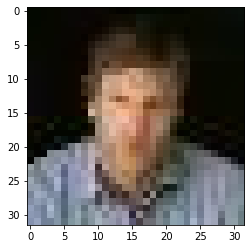

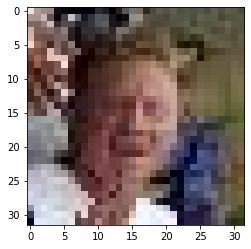

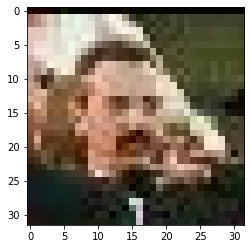

In [51]:
for i in range(3):
    imgs=imList[i]/255.0
    data_aug(imgs)
    plt.figure()
    plt.imshow(imgs)

## Before PCA, first 3 Images

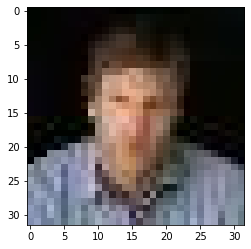

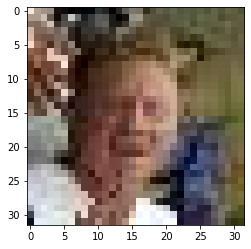

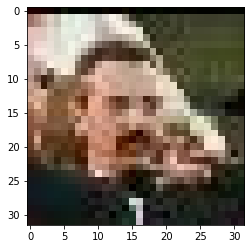

In [52]:
#original 32 x 32 image
for i in range(3):
    image = mpimg.imread(imgList[i])
    plt.figure()
    plt.imshow(image)

# Part 1 of Assignment 2 Ends Here
## Information Retrieval 
- ### Submitted to Ma'am Naima
- #### Submitted by : Hassan Ashiq BESE 23 C
- ###### Link to my GitHub Repository <a href="https://github.com/hassanashiqasse/PCA">Click Here</a>